In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('data/Top Indian Places to Visit.csv')
df.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [3]:
print(df.shape)
df.isnull().sum()

(325, 16)


Unnamed: 0                            0
Zone                                  0
State                                 0
City                                  0
Name                                  0
Type                                  0
Establishment Year                    0
time needed to visit in hrs           0
Google review rating                  0
Entrance Fee in INR                   0
Airport with 50km Radius              0
Weekly Off                          293
Significance                          0
DSLR Allowed                          0
Number of google review in lakhs      0
Best Time to visit                    0
dtype: int64

In [4]:
df.drop(columns='Weekly Off', inplace=True)

In [5]:
# Delete city that have more than 1 place

kota_yang_dihapus = ['Delhi', 'Goa', 'Hyderabad', 'Mumbai', 'Kolkata', 'Visakhapatnam', 'Bangalore', 'Ahmedabad', 'Jaipur', 
             'Leh', 'Kochi', 'Gangtok', 'New Delhi', 'Gurugram', 'Patna', 'Guwahati', 'Mathura', 'Amritsar', 
             'Vrindavan', 'Noida', 'Lucknow', 'Bhubaneswar', 'Rameswaram', 'Agra', 'Bhopal', 'Puducherry', 'Diu', 
             'Udaipur', 'Gandhinagar', 'Lonavala', 'Greater Noida', 'Bengaluru']

selected_columns = ['City', 'Google review rating']


data_asli = df.loc[~df['City'].isin(kota_yang_dihapus)]
data_asli = data_asli.loc[:, selected_columns]
data_asli.head()

,City,Google review rating
67,Dwarka,4.7
68,Junagadh,4.5
69,Bhuj,4.6
70,Vadodara,4.4
71,Somnath,4.8


In [6]:
df_double = df.loc[:, selected_columns]

In [7]:
def get_rating(df, kota):
    for index, main in df.iterrows():
        rating  = df_double[df_double['City'] == kota]['Google review rating'].mean()
        rating = int(rating * 100) / 100
        return rating

def new_df(df, kota, rating):
    new = pd.DataFrame({
    'City': [kota],
    'Google review rating': [rating]
    })

    new = pd.concat([df, new], ignore_index=True)
    return new

In [9]:
nama_kota = ['Goa', 'Hyderabad', 'Mumbai', 'Kolkata', 'Visakhapatnam', 'Bangalore', 'Ahmedabad', 'Jaipur', 
             'Leh', 'Kochi', 'Gangtok', 'New Delhi', 'Gurugram', 'Patna', 'Guwahati', 'Mathura', 'Amritsar', 
             'Vrindavan', 'Noida', 'Lucknow', 'Bhubaneswar', 'Rameswaram', 'Agra', 'Bhopal', 'Puducherry', 'Diu', 
             'Udaipur', 'Gandhinagar', 'Lonavala', 'Greater Noida', 'Bengaluru']

data = pd.DataFrame({
    'City': ['Delhi'],
    'Google review rating': [get_rating(df, 'Delhi')]
})

data_akhir = None
for i in range(len(nama_kota)):
    
    
    if i == len(nama_kota):
        break
    
    data_baru = pd.DataFrame({
    'City': [nama_kota[i]],
    'Google review rating': [get_rating(df, nama_kota[i])]
    })
    
    data_akhir = pd.concat([data_baru, data_akhir], ignore_index=True)

In [10]:
data_final = pd.concat([data_asli, data_akhir], ignore_index=True)
data_final = data_final.sort_values(by='Google review rating', ascending=True)
data_final = data_final.reset_index(drop=True)
data_final = data_final.iloc[-50:]
data_final

,City,Google review rating
163,Ratnagiri,4.70
164,Shirdi,4.70
165,Bhopal,4.70
166,Murudeshwar,4.70
167,Hampi,4.70
168,Thiruvananthapuram,4.70
169,Khajuraho,4.70
170,Dzükou Valley,4.70
171,dalhousie,4.70
172,Varanasi,4.70


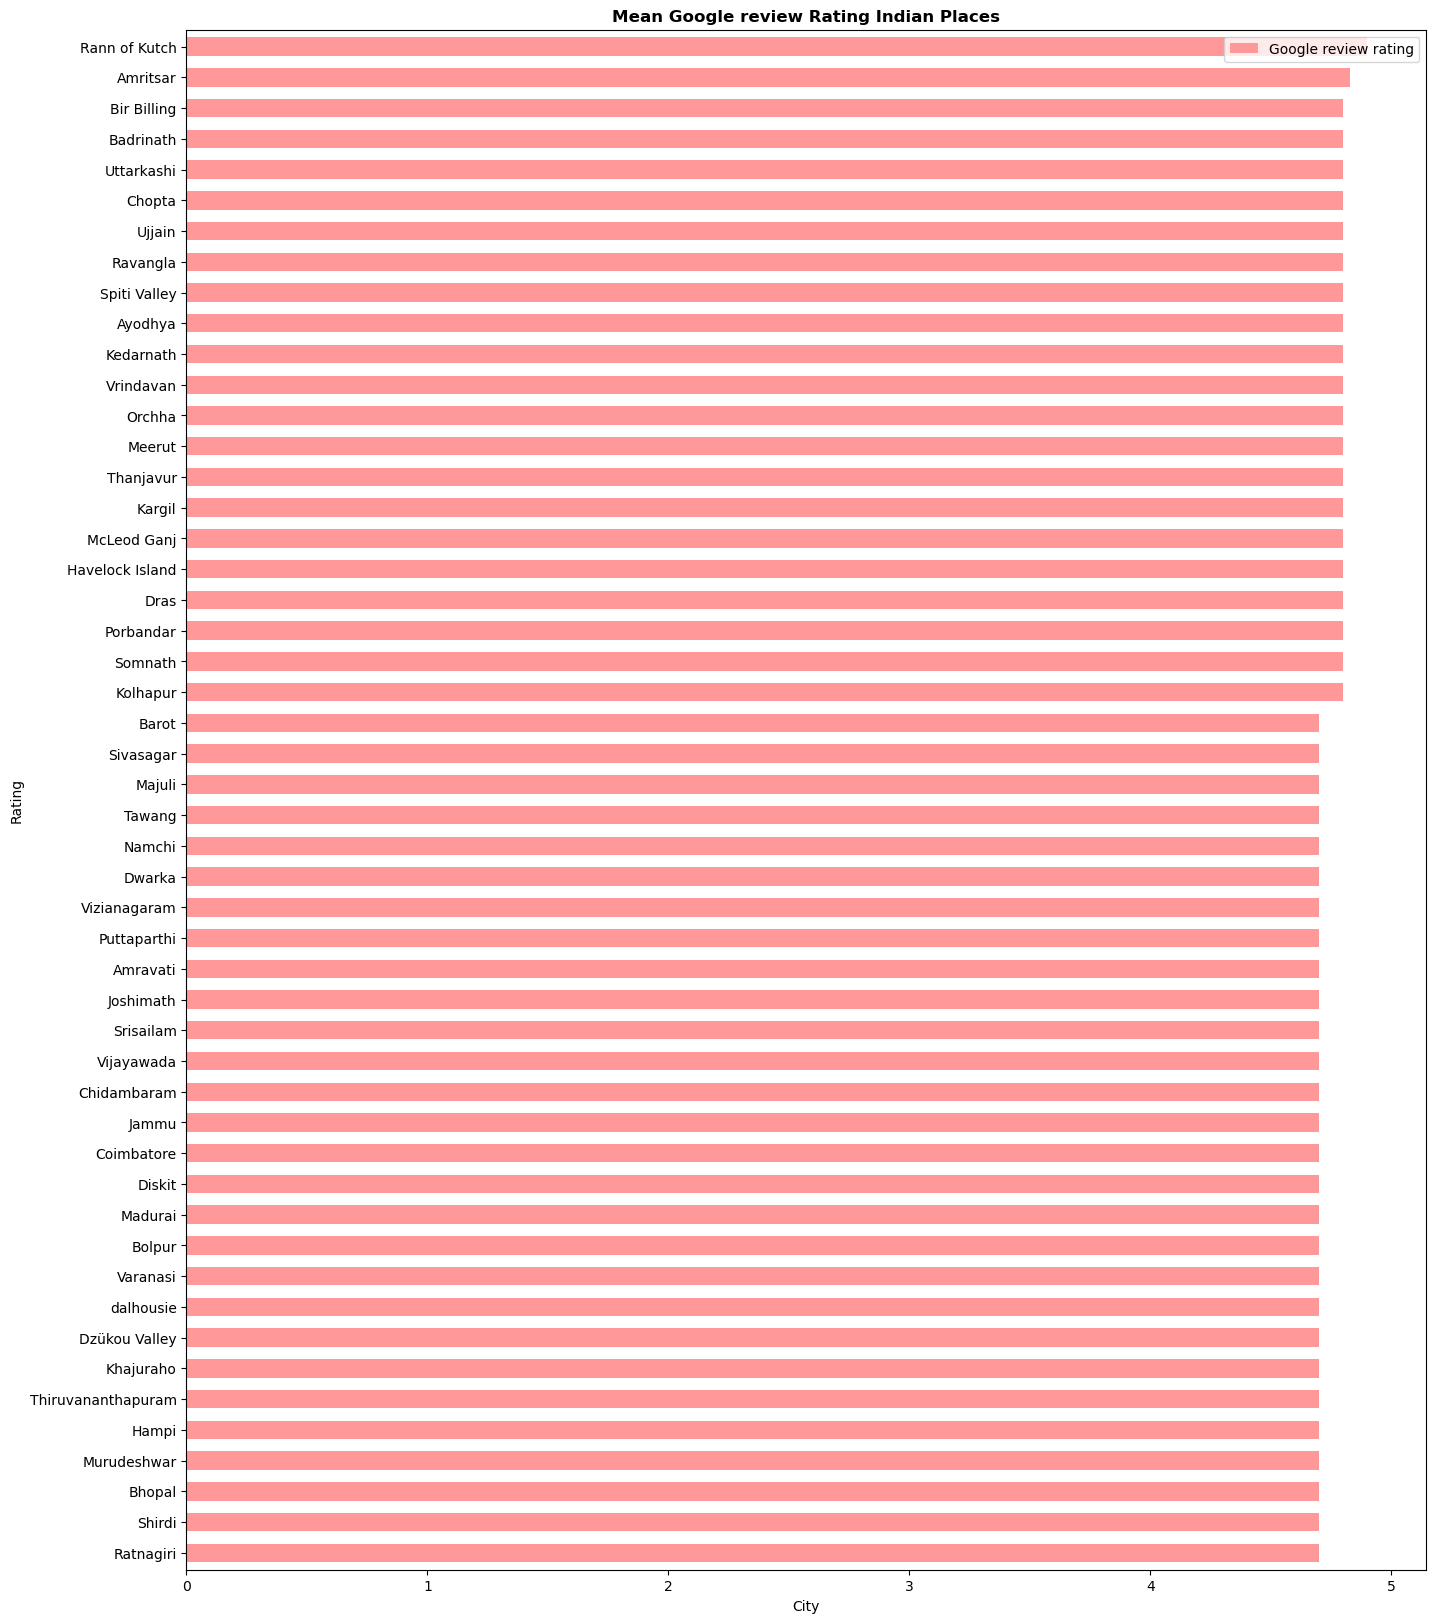

In [11]:
plt.rcParams['figure.figsize'] = (16, 20)
data_final.plot.barh(x='City', y='Google review rating', stacked=True, color='#FF9999', width=0.6)
plt.title('Mean Google review Rating Indian Places', weight = 'bold')
plt.xlabel('City')
plt.ylabel('Rating')
plt.show()

<Axes: xlabel='count', ylabel='State'>

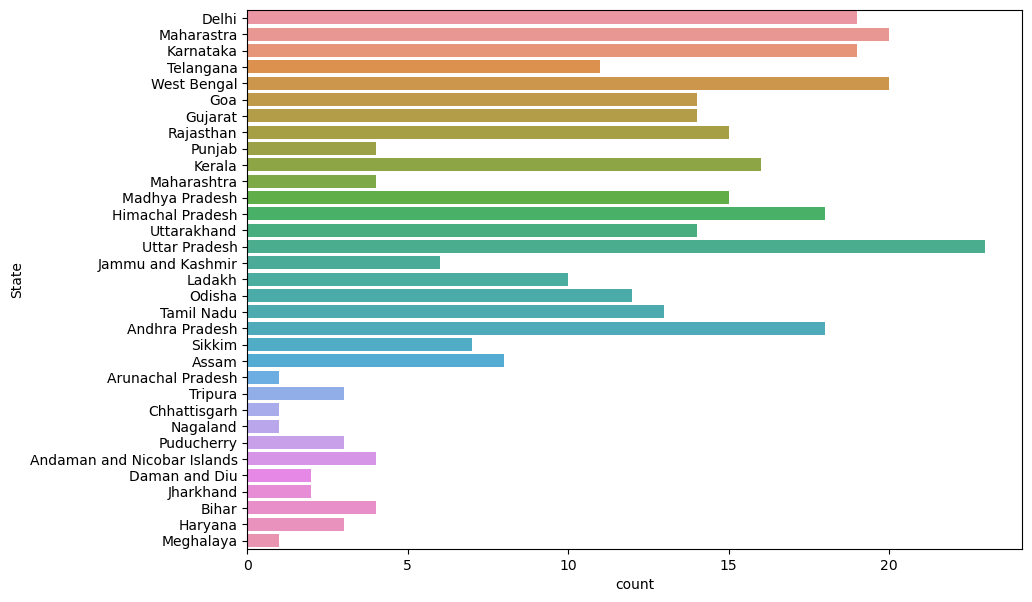

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(y='State',data=df)

In [13]:
df['Best Time to visit'].value_counts()

Best Time to visit
All          164
Morning       88
Afternoon     44
Evening       26
All            1
Anytime        1
Night          1
Name: count, dtype: int64

In [14]:
df['Best Time to visit'] = df['Best Time to visit'].replace({'Night':'Evening'})
df['Best Time to visit'] = df['Best Time to visit'].replace({'Anytime':'All'})
df['Best Time to visit'] = df['Best Time to visit'].replace({'All ':'All'})
df['Best Time to visit'].value_counts()

Best Time to visit
All          166
Morning       88
Afternoon     44
Evening       27
Name: count, dtype: int64

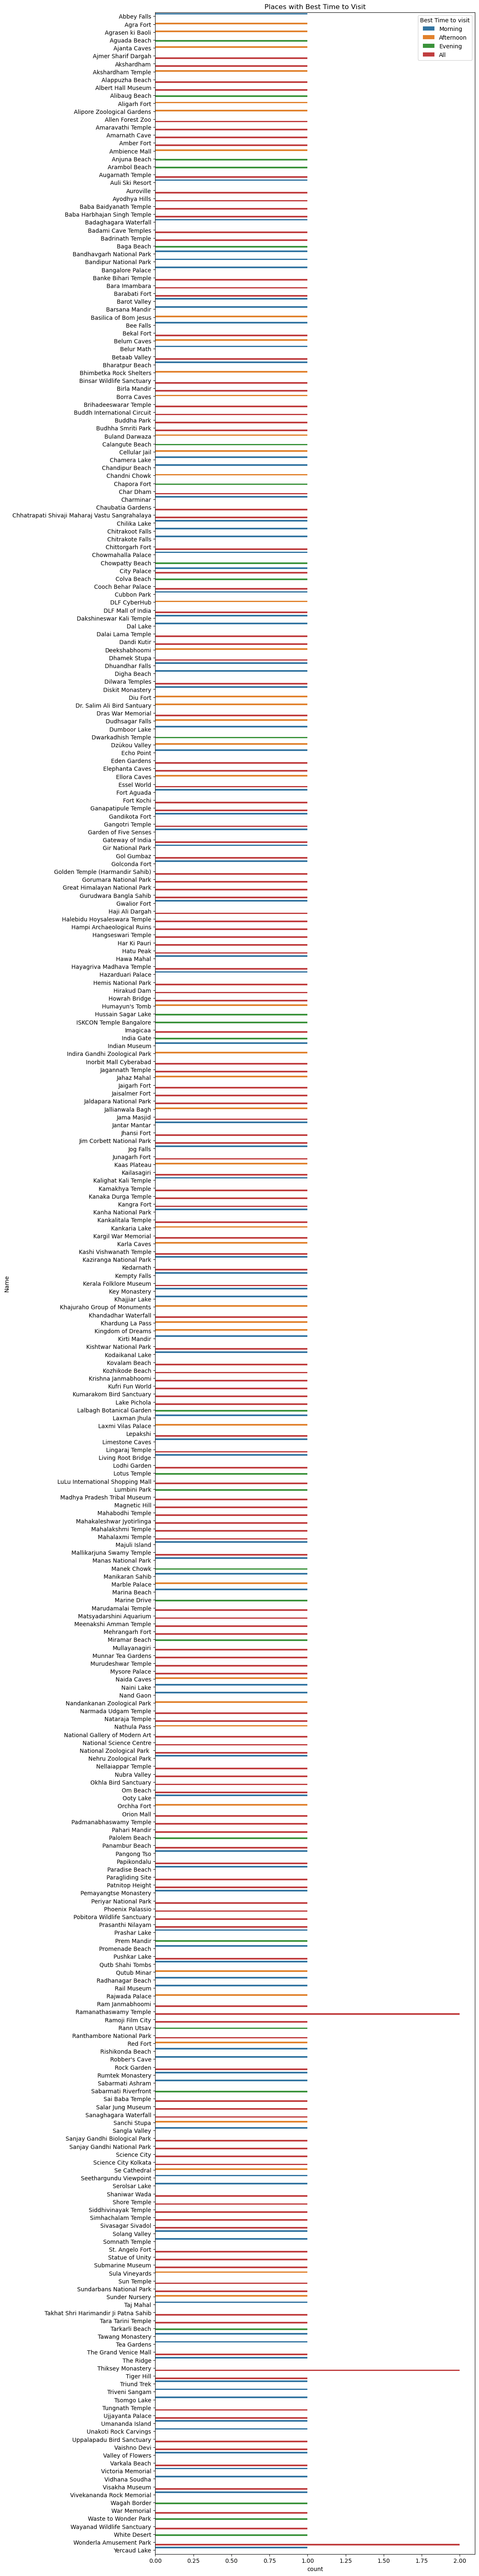

In [15]:
df = df.sort_values(by='Name')
plt.figure(figsize=(10, 80))
sns.countplot(y='Name', hue='Best Time to visit', data=df)
plt.title('Places with Best Time to Visit')
plt.show()